In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv('insurance.csv')
pd.set_option('display.max_columns', 20)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [9]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [10]:
insurance = df.drop_duplicates()

In [42]:
insurance.groupby('smoker')['expenses'].sum()

smoker
no     8972422.07
yes    8781763.56
Name: expenses, dtype: float64

In [11]:
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [15]:
insurance.expenses.describe()

count     1337.000000
mean     13279.121638
std      12110.359657
min       1121.870000
25%       4746.340000
50%       9386.160000
75%      16657.720000
max      63770.430000
Name: expenses, dtype: float64

In [16]:
insurance.age.describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

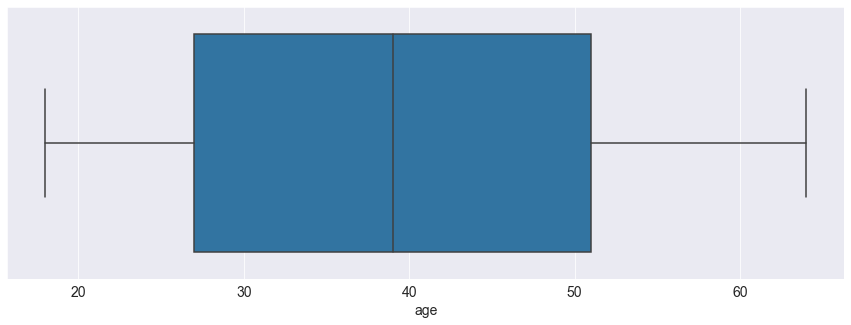

In [17]:
sns.boxplot(data=insurance, x='age');

In [18]:
insurance.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

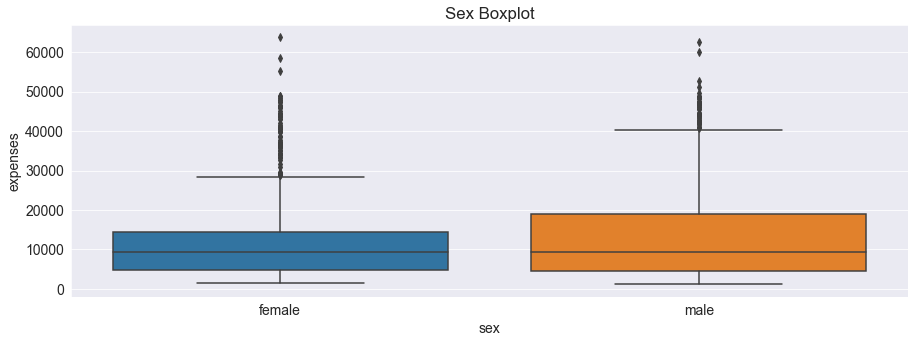

In [19]:
sns.boxplot(data=insurance, x='sex', y='expenses')
plt.title('Sex Boxplot');

In [23]:
insurance.groupby('sex')['expenses'].mean()

sex
female    12569.578897
male      13974.999111
Name: expenses, dtype: float64

In [17]:
females_expenses = insurance.groupby('sex')['expenses'].mean()[0]
male_expenses = insurance.groupby('sex')['expenses'].mean()[1]
male_expenses-females_expenses

1405.4202138301443

In [48]:
insurance[insurance.sex=='male'].expenses.describe()

count      675.000000
mean     13974.999111
std      12971.958641
min       1121.870000
25%       4654.025000
50%       9377.900000
75%      19006.690000
max      62592.870000
Name: expenses, dtype: float64

In [19]:
insurance[insurance.sex=='female'].expenses.describe()

count      662.000000
mean     12569.578897
std      11128.703817
min       1607.510000
25%       4885.162500
50%       9412.965000
75%      14454.690000
max      63770.430000
Name: expenses, dtype: float64

In [20]:
insurance.bmi.describe()

count    1337.000000
mean       30.665520
std         6.100664
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

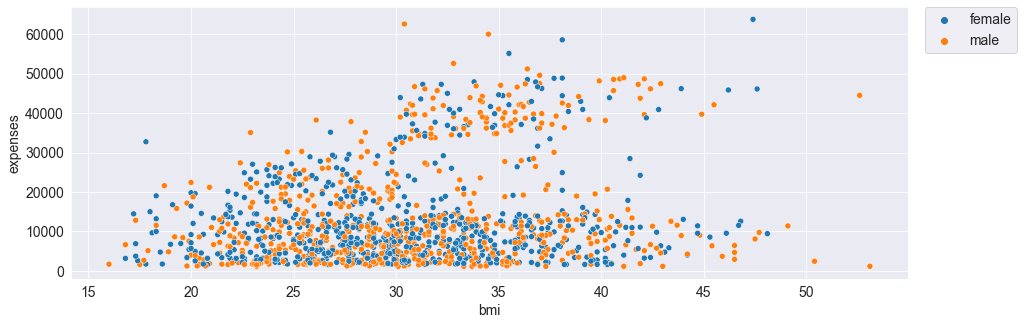

In [52]:
sns.scatterplot(data=insurance, x='bmi', y='expenses', hue='sex')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

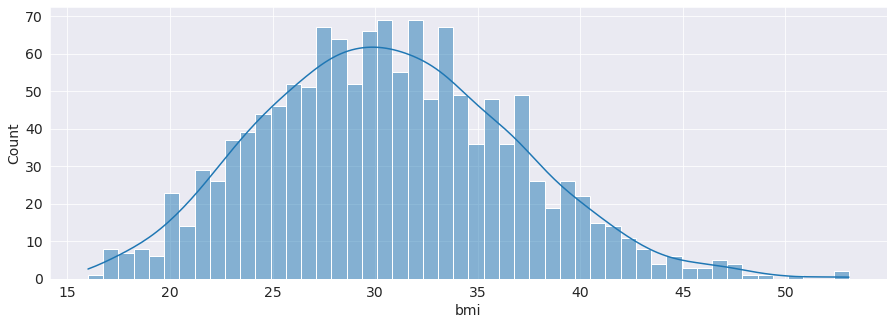

In [22]:
sns.histplot(data=insurance, x='bmi', bins=50, kde=True);

In [54]:
insurance.children.describe()

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

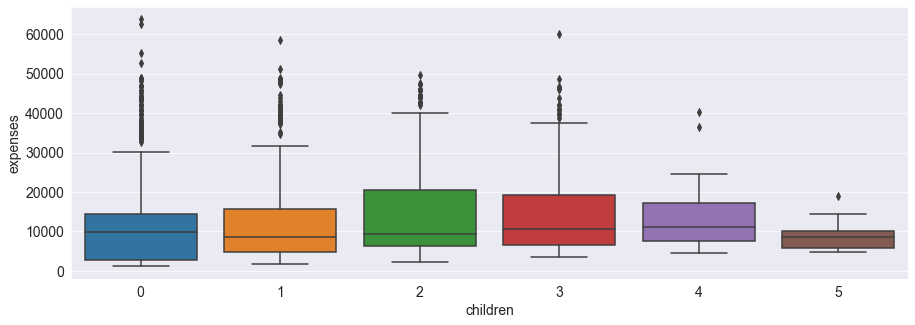

In [55]:
sns.boxplot(data=insurance, x='children', y='expenses');

In [56]:
insurance.groupby('children')['expenses'].mean()

children
0    12384.695515
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64

In [57]:
insurance.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

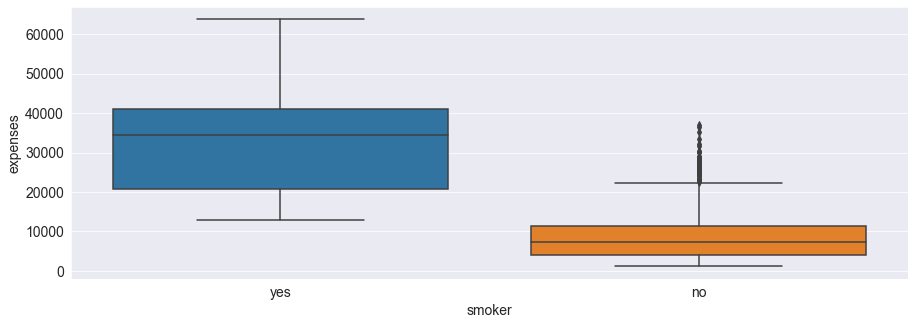

In [58]:
sns.boxplot(data=insurance, x='smoker', y='expenses');

In [59]:
insurance[insurance.smoker=='yes'].expenses.describe()

count      274.000000
mean     32050.231971
std      11541.547338
min      12829.460000
25%      20826.245000
50%      34456.350000
75%      41019.205000
max      63770.430000
Name: expenses, dtype: float64

In [60]:
insurance[insurance.smoker=='no'].expenses.describe()

count     1063.000000
mean      8440.660461
std       5992.973734
min       1121.870000
25%       3988.885000
50%       7345.730000
75%      11363.020000
max      36910.610000
Name: expenses, dtype: float64

In [61]:
insurance.groupby('smoker')['expenses'].mean()

smoker
no      8440.660461
yes    32050.231971
Name: expenses, dtype: float64

In [62]:
insurance.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

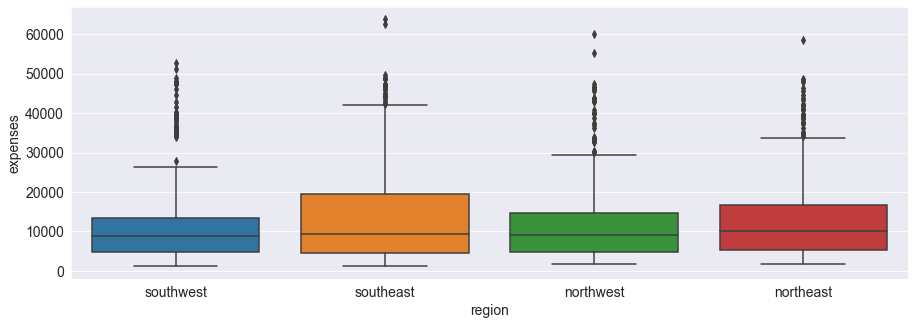

In [63]:
sns.boxplot(data=insurance, x='region', y='expenses');

In [64]:
input_df = insurance.drop(columns='expenses')
target_df = insurance.expenses

In [65]:
input_df

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [66]:
target_df.to_frame()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [72]:
def bmi_estimator(column):
    if column < 18.5:
        return 'underweight'
    elif (column >= 18.5) and (column<=24.9):
        return 'healthy weight'
    elif (column>=25) and (column<=29.9):
        return 'overweight'
    else:
        return 'obese'

In [75]:
input_df['bmi_class']=input_df.bmi.map(bmi_estimator)
input_df

,age,sex,bmi,children,smoker,region,bmi_class
0,19,female,27.9,0,yes,southwest,overweight
1,18,male,33.8,1,no,southeast,obese
2,28,male,33.0,3,no,southeast,obese
3,33,male,22.7,0,no,northwest,healthy weight
4,32,male,28.9,0,no,northwest,overweight
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,obese
1334,18,female,31.9,0,no,northeast,obese
1335,18,female,36.9,0,no,southeast,obese
1336,21,female,25.8,0,no,southwest,overweight


In [38]:
sex_dict = {'male':0, 'female':1}
smoker_dict = {'no':0, 'yes':1}

input_df['sex'] = input_df.sex.map(sex_dict)
input_df['smoker'] = input_df.smoker.map(smoker_dict)

In [39]:
columns_to_encode = ['region', 'bmi_class']

In [40]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(input_df[columns_to_encode])

encoded_cols = list(encoder.get_feature_names_out(columns_to_encode))

input_df[encoded_cols] = encoder.transform(input_df[columns_to_encode])

In [41]:
input_df = input_df.drop(columns='region')
input_df

,age,sex,bmi,children,smoker,bmi_class,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,19,1,27.9,0,1,overweight,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,18,0,33.8,1,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,28,0,33.0,3,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,33,0,22.7,0,0,healthy weight,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32,0,28.9,0,0,overweight,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,obese,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,18,1,31.9,0,0,obese,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,18,1,36.9,0,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,21,1,25.8,0,0,overweight,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [42]:
columns_to_scale = ['age','bmi','children']
input_df[columns_to_scale].head()

,age,bmi,children
0,19,27.9,0
1,18,33.8,1
2,28,33.0,3
3,33,22.7,0
4,32,28.9,0


In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(input_df[columns_to_scale])

input_df[columns_to_scale] = scaler.transform(input_df[columns_to_scale])

In [44]:
input_df = input_df.drop(columns='bmi_class')
input_df.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,0.021739,1,0.320755,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0,0.479784,0.2,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0,0.458221,0.6,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0,0.180593,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.304348,0,0.347709,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
input_df.describe().loc[['min','max']]

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(input_df, target_df, test_size=0.2, random_state=42)

In [47]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
1114,0.108696,0,0.229111,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
968,0.065217,0,0.261456,0.4,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
599,0.739130,1,0.579515,0.4,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
170,0.978261,0,0.687332,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
275,0.630435,1,0.285714,0.4,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.717391,1,0.512129,0.4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1131,0.195652,0,0.805930,0.4,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1295,0.043478,0,0.161725,0.2,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
861,0.434783,1,0.323450,0.6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [48]:
X_val

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
900,0.673913,0,0.175202,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1064,0.239130,1,0.258760,0.8,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1256,0.717391,1,0.549865,0.6,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
298,0.282609,0,0.495957,0.6,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
237,0.282609,0,0.603774,0.4,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1.000000,0,0.660377,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
542,0.978261,1,0.547170,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
760,0.086957,1,0.501348,0.4,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1284,0.934783,0,0.547170,0.2,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [49]:
y_train

1114     2396.10
968      3279.87
599     33471.97
170     13405.39
275      9715.84
          ...   
1096    44641.20
1131     3693.43
1295     1964.78
861      7151.09
1127     5836.52
Name: expenses, Length: 1069, dtype: float64

In [50]:
y_val

900      8688.86
1064     5708.87
1256    11436.74
298     38746.36
237      4463.21
          ...   
534     13831.12
542     13887.20
760      3925.76
1284    47403.88
1285     8534.67
Name: expenses, Length: 268, dtype: float64

In [51]:
from xgboost import XGBRegressor

In [52]:
model = XGBRegressor(n_jobs=-1, n_estimators=1000, early_stopping_rounds=50, random_state=42)
model.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_val,y_val)])

[0]	validation_0-rmse:12743.99933	validation_1-rmse:14345.11425
[1]	validation_0-rmse:9492.08657	validation_1-rmse:10611.42098
[2]	validation_0-rmse:7294.23234	validation_1-rmse:8246.03070
[3]	validation_0-rmse:5869.47678	validation_1-rmse:6668.32163
[4]	validation_0-rmse:4978.73136	validation_1-rmse:5675.83360
[5]	validation_0-rmse:4393.32606	validation_1-rmse:5101.30621
[6]	validation_0-rmse:4036.31925	validation_1-rmse:4791.93292
[7]	validation_0-rmse:3779.06843	validation_1-rmse:4630.50691
[8]	validation_0-rmse:3593.90388	validation_1-rmse:4515.81014
[9]	validation_0-rmse:3473.68273	validation_1-rmse:4465.13679
[10]	validation_0-rmse:3381.32250	validation_1-rmse:4436.50711
[11]	validation_0-rmse:3306.40720	validation_1-rmse:4411.38794
[12]	validation_0-rmse:3266.44028	validation_1-rmse:4404.40379
[13]	validation_0-rmse:3209.77569	validation_1-rmse:4401.11510
[14]	validation_0-rmse:3144.95365	validation_1-rmse:4397.46172
[15]	validation_0-rmse:3072.74307	validation_1-rmse:4417.57543

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [53]:
feature_importance_df = pd.DataFrame({
    'Feature':input_df.columns,
    'Importance':model.feature_importances_
})

feature_importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
4,smoker,0.896003
9,bmi_class_healthy weight,0.026056
2,bmi,0.022551
0,age,0.017158
3,children,0.008238
8,region_southwest,0.006763
11,bmi_class_overweight,0.005306
6,region_northwest,0.005143
5,region_northeast,0.004888
7,region_southeast,0.004432


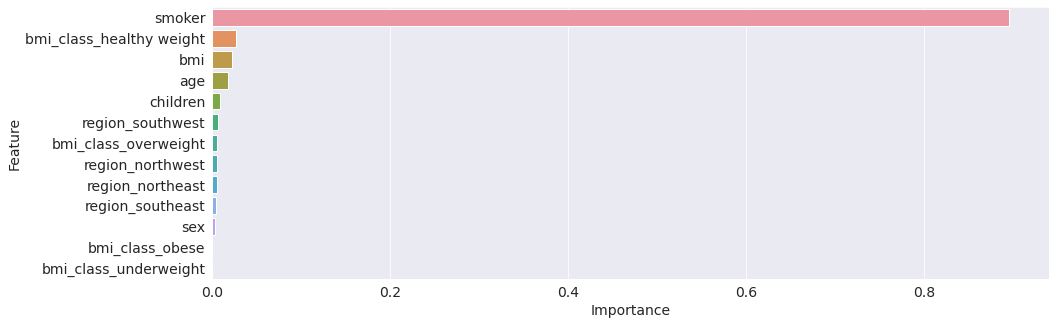

In [54]:
sns.barplot(data=feature_importance_df.sort_values('Importance', ascending=False), y='Feature', x='Importance');

In [55]:
model.best_ntree_limit

15

In [56]:
from sklearn.metrics import r2_score

print('The R^2 Score for the Training Set is: {}'.format(r2_score(y_train, model.predict(X_train))))
print('The R^2 Score for the Validation Set is: {}'.format(r2_score(y_val, model.predict(X_val))))

The R^2 Score for the Training Set is: 0.927759870682293
The R^2 Score for the Validation Set is: 0.8947644525337313


In [57]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_val, model.predict(X_val), squared=False)

nrmse = rmse/(max(target_df)-min(target_df))

print('The RMSE is: {}'.format(rmse))
print('The NRMSE is: {}'.format(nrmse))

The RMSE is: 4397.4618212013975
The NRMSE is: 0.07019254426919626


In [58]:
y_pred = model.predict(X_val)
y_pred[:10]

array([ 8677.204,  6092.927, 13169.318, 38586.48 ,  5521.644,  9595.958,
       39183.16 ,  2699.007,  8485.119, 10585.716], dtype=float32)

In [59]:
y_val[:10]

900      8688.86
1064     5708.87
1256    11436.74
298     38746.36
237      4463.21
481      9304.70
240     38511.63
277      2150.47
415      7345.73
707     10264.44
Name: expenses, dtype: float64

In [67]:
final_model = XGBRegressor(n_jobs=-1, n_estimators=13, max_depth=3, learning_rate=0.35, min_child_weight=8, random_state=42)
final_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.35, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=8,
             missing=nan, monotone_constraints='()', n_estimators=13, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [68]:
print('The R^2 Score for the Training Set is: {}'.format(r2_score(y_train, final_model.predict(X_train))))
print('The R^2 Score for the Validation Set is: {}'.format(r2_score(y_val, final_model.predict(X_val))))

The R^2 Score for the Training Set is: 0.8677637036700018
The R^2 Score for the Validation Set is: 0.9035996711761605


In [69]:
rmse = mean_squared_error(y_val, final_model.predict(X_val), squared=False)

nrmse = rmse/(max(target_df)-min(target_df))

print('The RMSE is: {}'.format(rmse))
print('The NRMSE is: {}'.format(nrmse))

The RMSE is: 4208.817580609396
The NRMSE is: 0.06718139380393413


In [70]:
def make_new_predictions(single_input):
    single_input_df = pd.DataFrame([single_input])
    single_input_df['bmi_class']=single_input_df.bmi.map(bmi_estimator)
    single_input_df['sex'] = single_input_df.sex.map(sex_dict)
    single_input_df['smoker'] = single_input_df.smoker.map(smoker_dict)
    single_input_df[encoded_cols] = encoder.transform(single_input_df[columns_to_encode]) 
    single_input_df[columns_to_scale] = scaler.transform(single_input_df[columns_to_scale])
    single_input_df = single_input_df.drop(columns=['region', 'bmi_class'])
    pred = final_model.predict(single_input_df)[0]
    return 'The charge is: ${}'.format(pred)

In [71]:
new_input = {
    'age':23,
    'sex':'male',
    'bmi':28.1,
    'children':0,
    'smoker':'no',
    'region':'northwest'
}

In [72]:
make_new_predictions(new_input)

'The charge is: $4237.494140625'